<H3>Load packages</H3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.misc import imread, imsave, imresize, imshow

%matplotlib inline

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

from keras.models import model_from_json
from statefarm import *

Using Theano backend.


<H3>Process train images</H3>

In [2]:
X_train, y_train, X_val, y_val = process_train('train', 3, 128, 128, 0.1)

Number of classes in training: 10
Total no. of images in training: 22424
Processing class: 0
Processing class: 1
Processing class: 2
Processing class: 3
Processing class: 4
Processing class: 5
Processing class: 6
Processing class: 7
Processing class: 8
Processing class: 9
Completed Processing
Size of training set: (20182L, 3L, 128L, 128L)
Size of training labels: (20182L, 10L)
Size of validation set: (2242L, 3L, 128L, 128L)
Size of validation labels: (2242L, 10L)


c:\python27\lib\site-packages\keras\utils\np_utils.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


<H3>Display a sample image from train set</H3>

Image Classs: 7


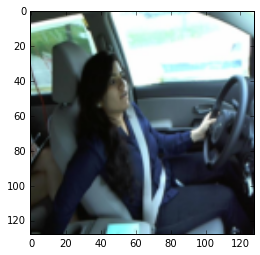

In [3]:
display_sample(X_train, y_train)

<H3>Display a sample image from validation set</H3>

Image Classs: 0


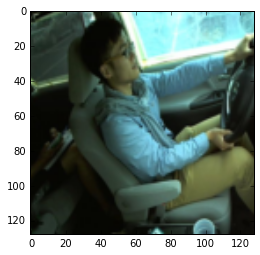

In [4]:
display_sample(X_val, y_val)

<H3>Create a network</H3>

In [5]:
model = create_network(3, 128, 128, 0.01, 1e-6, 0.9, 10)

<H3>Fit the model</H3>

In [6]:
model.fit(X_train, y_train, nb_epoch=2, batch_size=64, validation_data = (X_val, y_val), verbose=1)

Train on 20182 samples, validate on 2242 samples
Epoch 1/2
20182/20182 [==============================] - 74810s - loss: 1.3292 - val_loss: 0.2916
Epoch 2/2
20182/20182 [==============================] - 75863s - loss: 0.2615 - val_loss: 0.0859


<H3>Save the model and model weights</H3>

In [7]:
json_model = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(json_model)
    
model.save_weights('model_final_weights.h5')

<H3>Predict test image classes and create submission file</H3>

In [8]:
submission = predict_test('test',model,128,128)
submission.to_csv("submission_final.csv", index=False)

Processing test image 0 of 79726
Processing test image 5000 of 79726
Processing test image 10000 of 79726
Processing test image 15000 of 79726
Processing test image 20000 of 79726
Processing test image 25000 of 79726
Processing test image 30000 of 79726
Processing test image 35000 of 79726
Processing test image 40000 of 79726
Processing test image 45000 of 79726
Processing test image 50000 of 79726
Processing test image 55000 of 79726
Processing test image 60000 of 79726
Processing test image 65000 of 79726
Processing test image 70000 of 79726
Processing test image 75000 of 79726
